### Instalando os pacotes necessários

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install scipy
!pip install scikit-learn
!pip install pingouin

### Importação das bibliotecas necessárias

In [39]:
import pandas as pd
from sqlalchemy import create_engine, text
from datetime import datetime
import numpy as np
import pyodbc

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import scipy.stats as stats
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pingouin as pg
import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='browser'

### Leitura dos dados

In [40]:
# Objetivo: agrupar os clientes que receberam e-mail marketing
# Analisar os grupos de clientes por meio das suas interações com os envios

dados = pd.read_excel(r'C:\Users\caio.hsouza\OneDrive - MRV (1)\Área de Trabalho\knn linkedin\dados_emails.xlsx')
dados.head()

,id,qtd_emails_recebidos,qtd_abertura_email,qtd_click_email
0,1,52,4,3
1,2,112,2,1
2,3,80,1,1
3,4,69,20,2
4,5,32,11,1


In [41]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   id                    10000 non-null  int64
 1   qtd_emails_recebidos  10000 non-null  int64
 2   qtd_abertura_email    10000 non-null  int64
 3   qtd_click_email       10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB


In [42]:
# Primeiramente, vamos selecionar apenas os campos das variáveis que serão utilizadas

cluster = dados[['qtd_emails_recebidos', 'qtd_abertura_email', 'qtd_click_email']]
cluster = cluster.fillna(0)
cluster = cluster.apply(pd.to_numeric, errors='coerce')
cluster

,qtd_emails_recebidos,qtd_abertura_email,qtd_click_email
0,52,4,3
1,112,2,1
2,80,1,1
3,69,20,2
4,32,11,1
...,...,...,...
9995,94,47,6
9996,100,1,3
9997,111,1,1
9998,54,9,1


In [43]:
# Obtendo as estatísticas descritivas das variáveis
# Caso as variáveis sejam muito "diferentes" entre si, é válido padronizar o dataset para análise

tab_descritivas = cluster.describe().T
tab_descritivas

,count,mean,std,min,25%,50%,75%,max
qtd_emails_recebidos,10000.0,61.8064,28.638557,1.0,41.0,61.0,81.0,167.0
qtd_abertura_email,10000.0,19.8930,21.412239,1.0,1.0,13.0,32.0,132.0
qtd_click_email,10000.0,2.2162,1.869387,1.0,1.0,1.0,3.0,14.0


In [44]:
# Gráfico 3D das observações

fig = px.scatter_3d(cluster, 
                    x='qtd_emails_recebidos', 
                    y='qtd_abertura_email', 
                    z='qtd_click_email')
fig.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

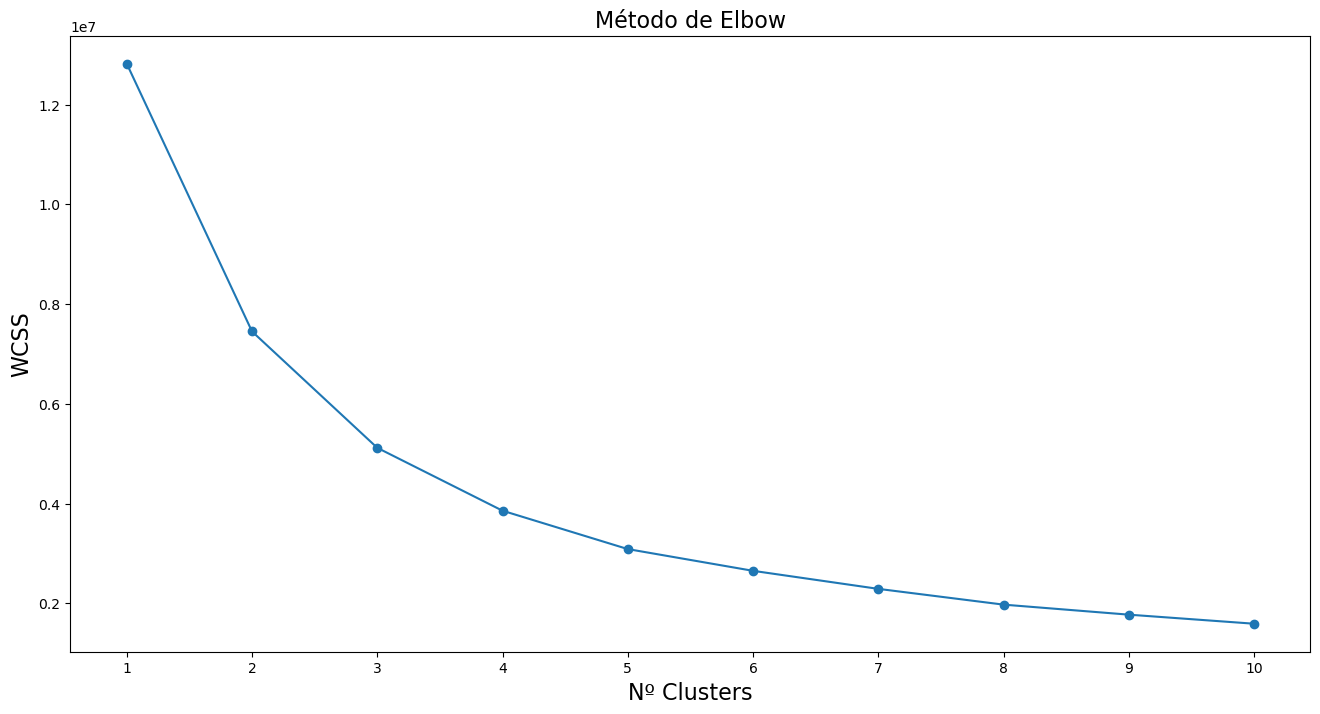

In [45]:
# Identificação da quantidade de clusters (Método Elbow)

elbow = []
K = range(1,11) # ponto de parada pode ser parametrizado manualmente
for k in K:
    kmeanElbow = KMeans(n_clusters=k, init='random', random_state=100).fit(cluster)
    elbow.append(kmeanElbow.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, elbow, marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.xticks(range(1,11)) # ajustar range
plt.ylabel('WCSS', fontsize=16)
plt.title('Método de Elbow', fontsize=16)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

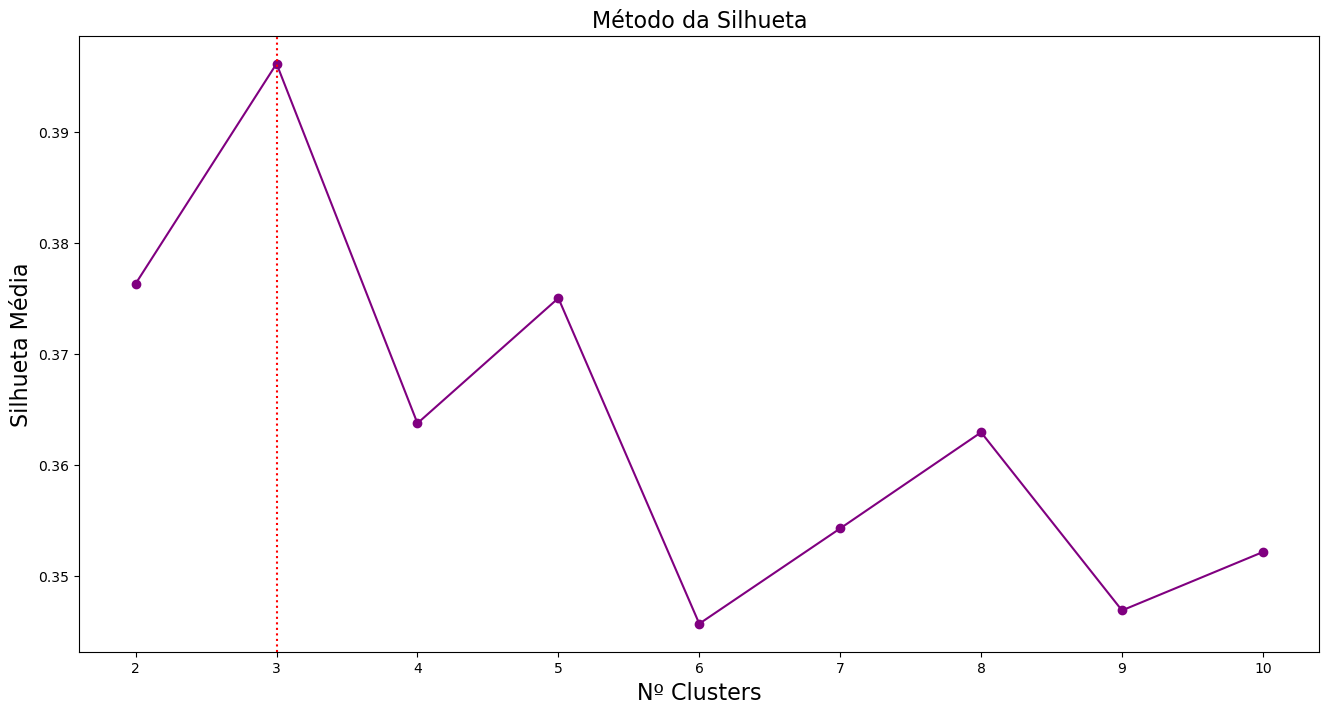

In [46]:
# Identificação da quantidade de clusters (Método da Silhueta)

silhueta = []
I = range(2,11) # ponto de parada pode ser parametrizado manualmente
for i in I: 
    kmeansSil = KMeans(n_clusters=i, init='random', random_state=100).fit(cluster)
    silhueta.append(silhouette_score(cluster, kmeansSil.labels_))

plt.figure(figsize=(16,8))
plt.plot(range(2, 11), silhueta, color = 'purple', marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.ylabel('Silhueta Média', fontsize=16)
plt.title('Método da Silhueta', fontsize=16)
plt.axvline(x = silhueta.index(max(silhueta))+2, linestyle = 'dotted', color = 'red') 
plt.show()


In [47]:
# Vamos considerar 3 clusters, considerando as evidências anteriores!

kmeans_final = KMeans(n_clusters = 3, init = 'random', random_state=100).fit(cluster)

# Gerando a variável para identificarmos os clusters gerados

kmeans_clusters = kmeans_final.labels_
cluster['cluster_kmeans'] = kmeans_clusters
cluster['cluster_kmeans'] = cluster['cluster_kmeans'].astype('category')


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [59]:
cluster

,qtd_emails_recebidos,qtd_abertura_email,qtd_click_email,cluster_kmeans
0,52,4,3,2
1,112,2,1,1
2,80,1,1,1
3,69,20,2,1
4,32,11,1,2
...,...,...,...,...
9995,94,47,6,1
9996,100,1,3,1
9997,111,1,1,1
9998,54,9,1,2


In [49]:
# Interpretação do output:

## cluster_kmeans MS: indica a variabilidade entre grupos
## Within MS: indica a variabilidade dentro dos grupos
## F: estatística de teste (cluster_kmeans MS / Within MS)
## p-unc: p-valor da estatística F
## se p-valor < 0.05: pelo menos um cluster apresenta média estatisticamente diferente dos demais

# qtd_emails_recebidos
pg.anova(dv='qtd_emails_recebidos', 
         between='cluster_kmeans', 
         data=cluster,
         detailed=True).T

# qtd_abertura_email
pg.anova(dv='qtd_abertura_email', 
         between='cluster_kmeans', 
         data=cluster,
         detailed=True).T

 # qtd_click_email
pg.anova(dv='qtd_click_email', 
         between='cluster_kmeans', 
         data=cluster,
         detailed=True).T

,0,1
Source,cluster_kmeans,Within
SS,25.741354,34916.834246
DF,2,9997
MS,12.870677,3.492731
F,3.684989,NaN
p-unc,0.025132,NaN
np2,0.000737,NaN


In [50]:
# Gráfico 3D dos clusters

fig = px.scatter_3d(cluster, 
                    x='qtd_emails_recebidos', 
                    y='qtd_abertura_email', 
                    z='qtd_click_email',
                    color='cluster_kmeans')
fig.show()

In [55]:
# Estatísticas descritivas por grupo

cluster_grupo = cluster.groupby(by=['cluster_kmeans'])

tab_desc_grupo = cluster_grupo.describe().T
tab_desc_grupo

cluster_kmeans                        0            1            2
qtd_emails_recebidos count  2025.000000  3758.000000  4217.000000
                     mean     55.746173    89.480575    40.054541
                     std      21.176133    17.858120    16.496776
                     min       1.000000    65.000000     1.000000
                     25%      42.000000    75.000000    28.000000
                     50%      57.000000    86.000000    42.000000
                     75%      69.000000   100.000000    54.000000
                     max     134.000000   167.000000    65.000000
qtd_abertura_email   count  2025.000000  3758.000000  4217.000000
                     mean     52.688889    13.419638     9.913208
                     std      16.833085    14.432216    10.590155
                     min      26.000000     1.000000     1.000000
                     25%      40.000000     1.000000     1.000000
                     50%      49.000000     8.000000     5.000000
                     75%      62.000000    23.000000    18.000000
                     max     132.000000    83.000000    47.000000
qtd_click_email      count  2025.000000  3758.000000  4217.000000
                     mean      2.135309     2.200905     2.268674
                     std       1.835493     1.836497     1.912867
                     min       1.000000     1.000000     1.000000
                     25%       1.000000     1.000000     1.000000
                     50%       1.000000     1.000000     1.000000
                     75%       3.000000     3.000000     3.000000
                     max      13.000000    14.000000    12.000000

In [63]:
cluster

,qtd_emails_recebidos,qtd_abertura_email,qtd_click_email,cluster_kmeans
0,52,4,3,2
1,112,2,1,1
2,80,1,1,1
3,69,20,2,1
4,32,11,1,2
...,...,...,...,...
9995,94,47,6,1
9996,100,1,3,1
9997,111,1,1,1
9998,54,9,1,2


In [66]:
cluster_mapping = {
    0: 'hotlead',
    1: 'saturado',
    2: 'inicio_jornada'
}


cluster['status'] = cluster['cluster_kmeans'].map(cluster_mapping).fillna('')
cluster

,qtd_emails_recebidos,qtd_abertura_email,qtd_click_email,cluster_kmeans,status
0,52,4,3,2,inicio_jornada
1,112,2,1,1,saturado
2,80,1,1,1,saturado
3,69,20,2,1,saturado
4,32,11,1,2,inicio_jornada
...,...,...,...,...,...
9995,94,47,6,1,saturado
9996,100,1,3,1,saturado
9997,111,1,1,1,saturado
9998,54,9,1,2,inicio_jornada


In [67]:
fig = px.scatter_3d(cluster, 
                    x='qtd_emails_recebidos', 
                    y='qtd_abertura_email', 
                    z='qtd_click_email',
                    color='status')  # Usando a coluna 'status' para colorir
fig.show()